# AAL3 for ADNI patients -- correction of November

All the imports and installs we'll need.


In [1]:
import os
#import torch
#from torch import nn
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

#import networkx as nx
#from networkx.convert_matrix import from_numpy_matrix

In [2]:
import numpy as np

# Example matrices
matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[1, 2, 0.5], [0.25, 0.2, 0.1], [10, 20, 0]])

# Invert the elements of matrix2, handle zeros to avoid division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    inverse_matrix2 = np.where(matrix2 != 0, 1 / matrix2, 0)  # set inverse of 0 elements to 0

# Multiply element-wise
result_matrix = matrix1 * inverse_matrix2

print("Matrix 1:")
print(matrix1)

print("Matrix 2:")
print(matrix2)

print("Inverse of Matrix 2:")
print(inverse_matrix2)

print("Element-wise multiplication of Matrix 1 and inverse of Matrix 2:")
print(result_matrix)


Matrix 1:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix 2:
[[ 1.    2.    0.5 ]
 [ 0.25  0.2   0.1 ]
 [10.   20.    0.  ]]
Inverse of Matrix 2:
[[ 1.    0.5   2.  ]
 [ 4.    5.   10.  ]
 [ 0.1   0.05  0.  ]]
Element-wise multiplication of Matrix 1 and inverse of Matrix 2:
[[ 1.   1.   6. ]
 [16.  25.  60. ]
 [ 0.7  0.4  0. ]]


In [9]:
# test with AAL3 atlas

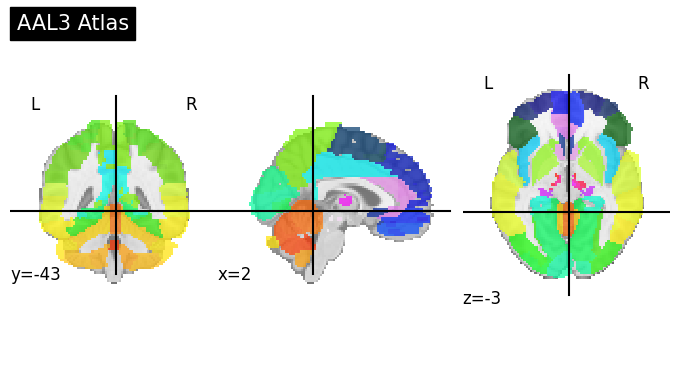

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting, input_data
import nibabel as nib

# Path to your downloaded AAL3 atlas NIfTI file
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'

# Path to your downloaded AAL3 labels file (e.g., CSV or TXT)
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the labels
with open(aal3_labels_filename, 'r') as f:
    roi_names = [line.strip() for line in f]
    roi_labels = [line.strip() for line in f]

# Create a masker using NiftiLabelsMasker

# Just for demonstration, let's plot the atlas regions
atlas_img = nib.load(aal3_atlas_filename)

# Plot the AAL3 atlas
plotting.plot_roi(atlas_img, title='AAL3 Atlas')

plt.show()


In [4]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom

In [6]:


# Define the directory containing DICOM files
#dicom_folder = "/Users/mariamannone/Downloads/ADNI 4/002_S_5018/Resting_State_fMRI/2013-02-11_07_46_12.0/I358614"
dicom_folder = "/Users/mariamannone/Downloads/ADNI 2/002_S_5018/Resting_State_fMRI/2012-11-08_07_20_35.0/I346237"

# Define the output folder for NIfTI files
output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]

# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)


In [5]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa/output.nii.gz/501_resting_state_fmri.nii.gz"


masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



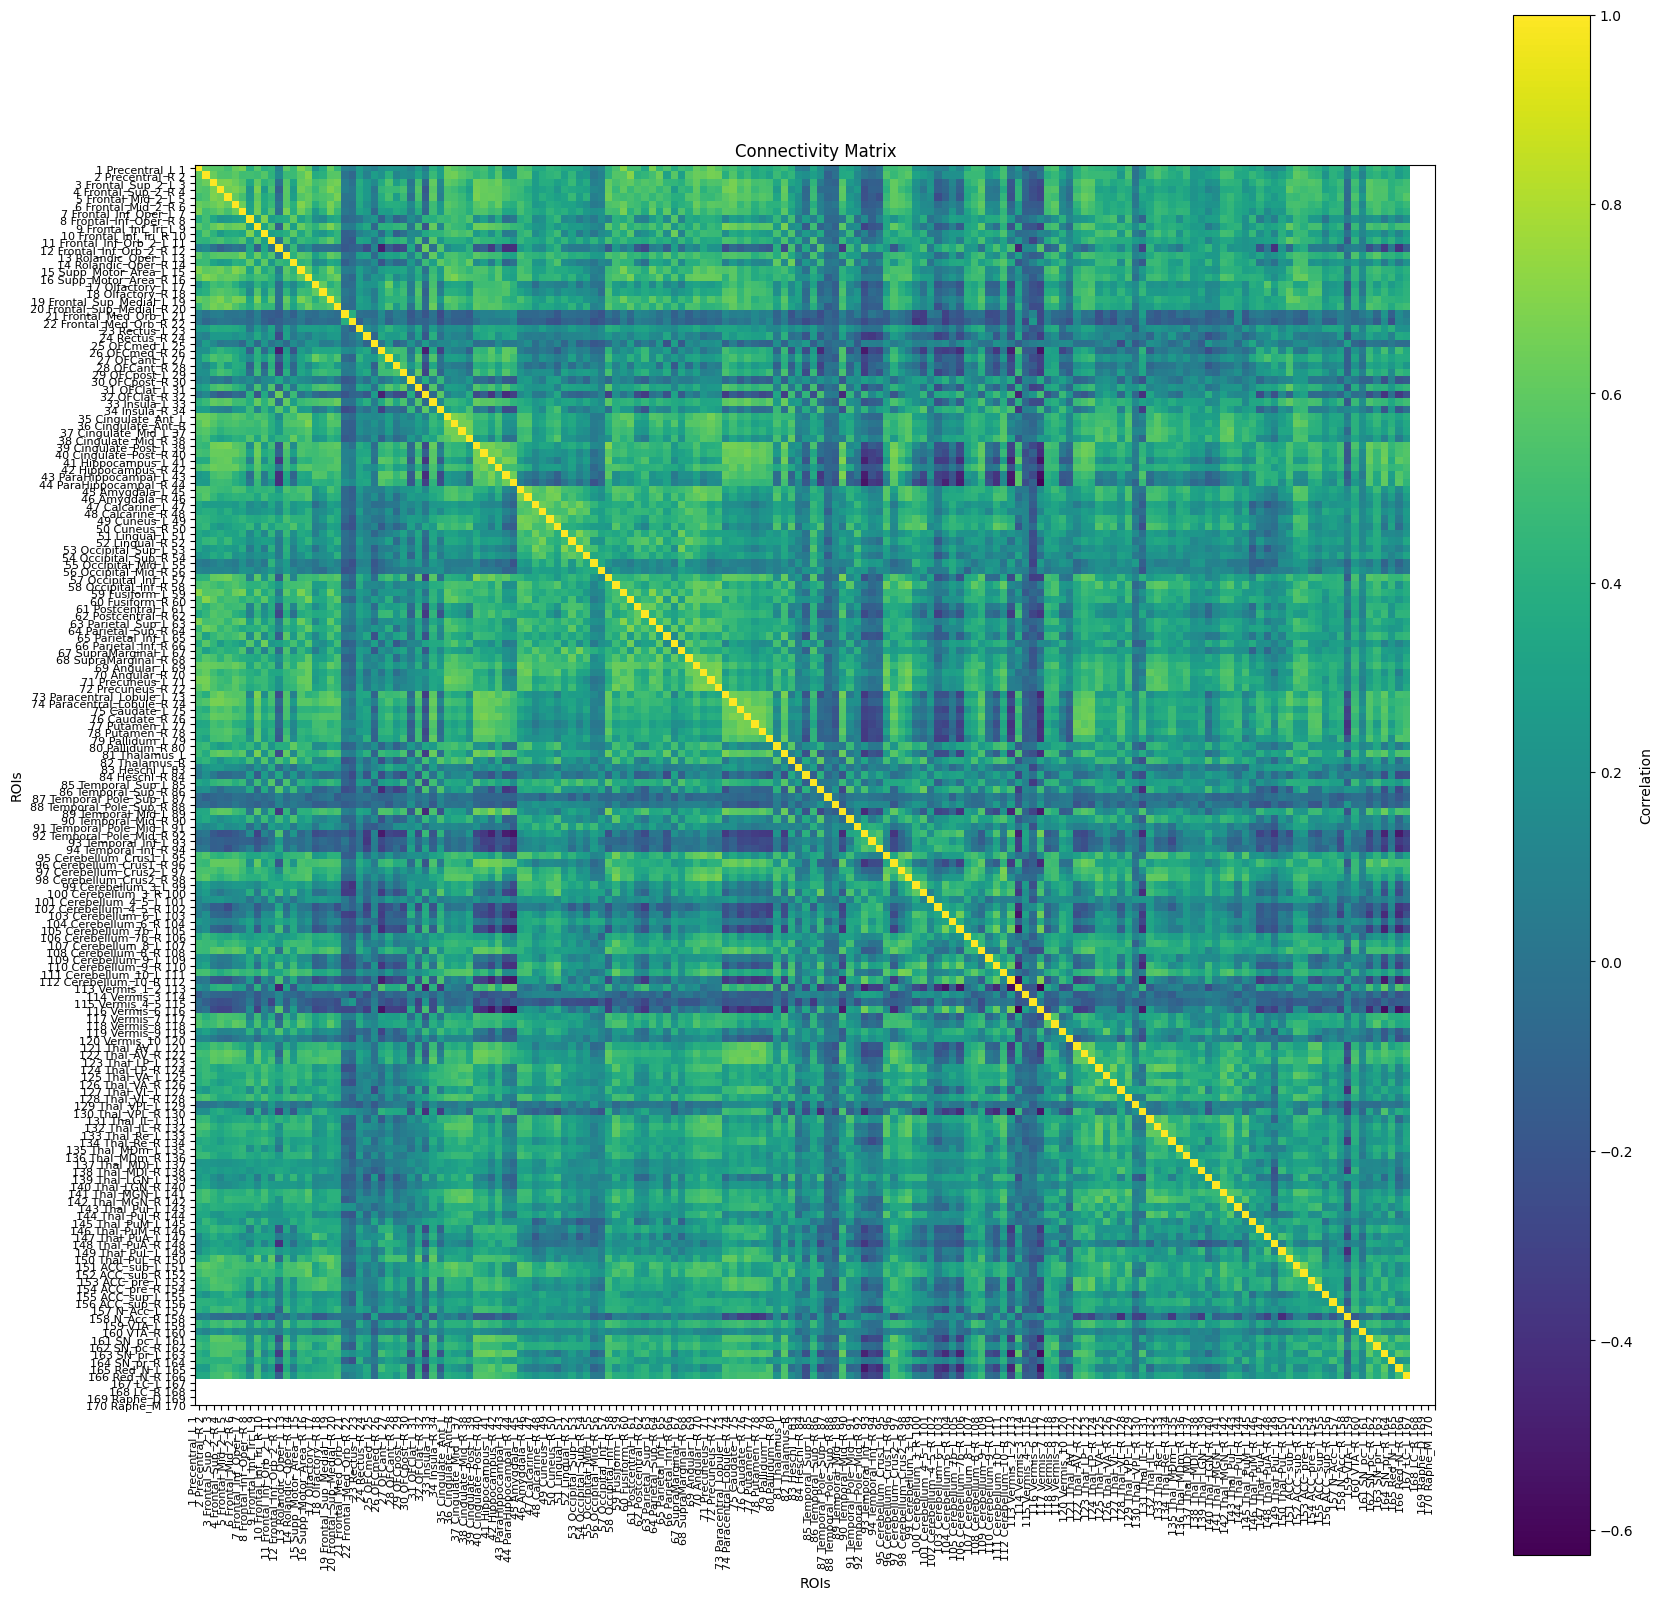

In [6]:

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [7]:
male_BL = connectivity_matrix

%store male_BL

np.savez('male_BL.npz', data = male_BL)

Stored 'male_BL' (ndarray)


In [8]:

# No! This is patient C.
#dicom_folder = "/Users/mariamannone/Downloads/ADNI 5/006_S_4153/Resting_State_fMRI/2011-11-04_11_36_04.0/I264987"
dicom_folder = "/Users/mariamannone/Downloads/ADNI 2/002_S_5018/Resting_State_fMRI/2013-02-11_07_46_12.0/I358614"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file_fu = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file_fu, compression=True, reorient=True)



/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.03841643537523376046'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.03817532478714656004'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.03802804297410140032'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/Users/mariamannone/test2/lib/python3.10/site-packages/pydico

In [11]:

# Define the path to the NIfTI file
#nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/801_resting_state_fmri.nii.gz"
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/501_resting_state_fmri.nii.gz"

#fmri_img_fu = nib.load(nifti_file_fu)

masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Load and standardize time series using the masker
time_series_fu = masker.fit_transform(nifti_file_fu)

# Compute the connectivity matrix (correlation)
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices_fu = correlation_measure_fu.fit_transform([time_series_fu])

# Extract the connectivity matrix
connectivity_matrix_fu = correlation_matrices_fu[0]



/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {134, 167, 168, 106, 111}. Label image only contains 162 labels (including background).
  warnings.warn(


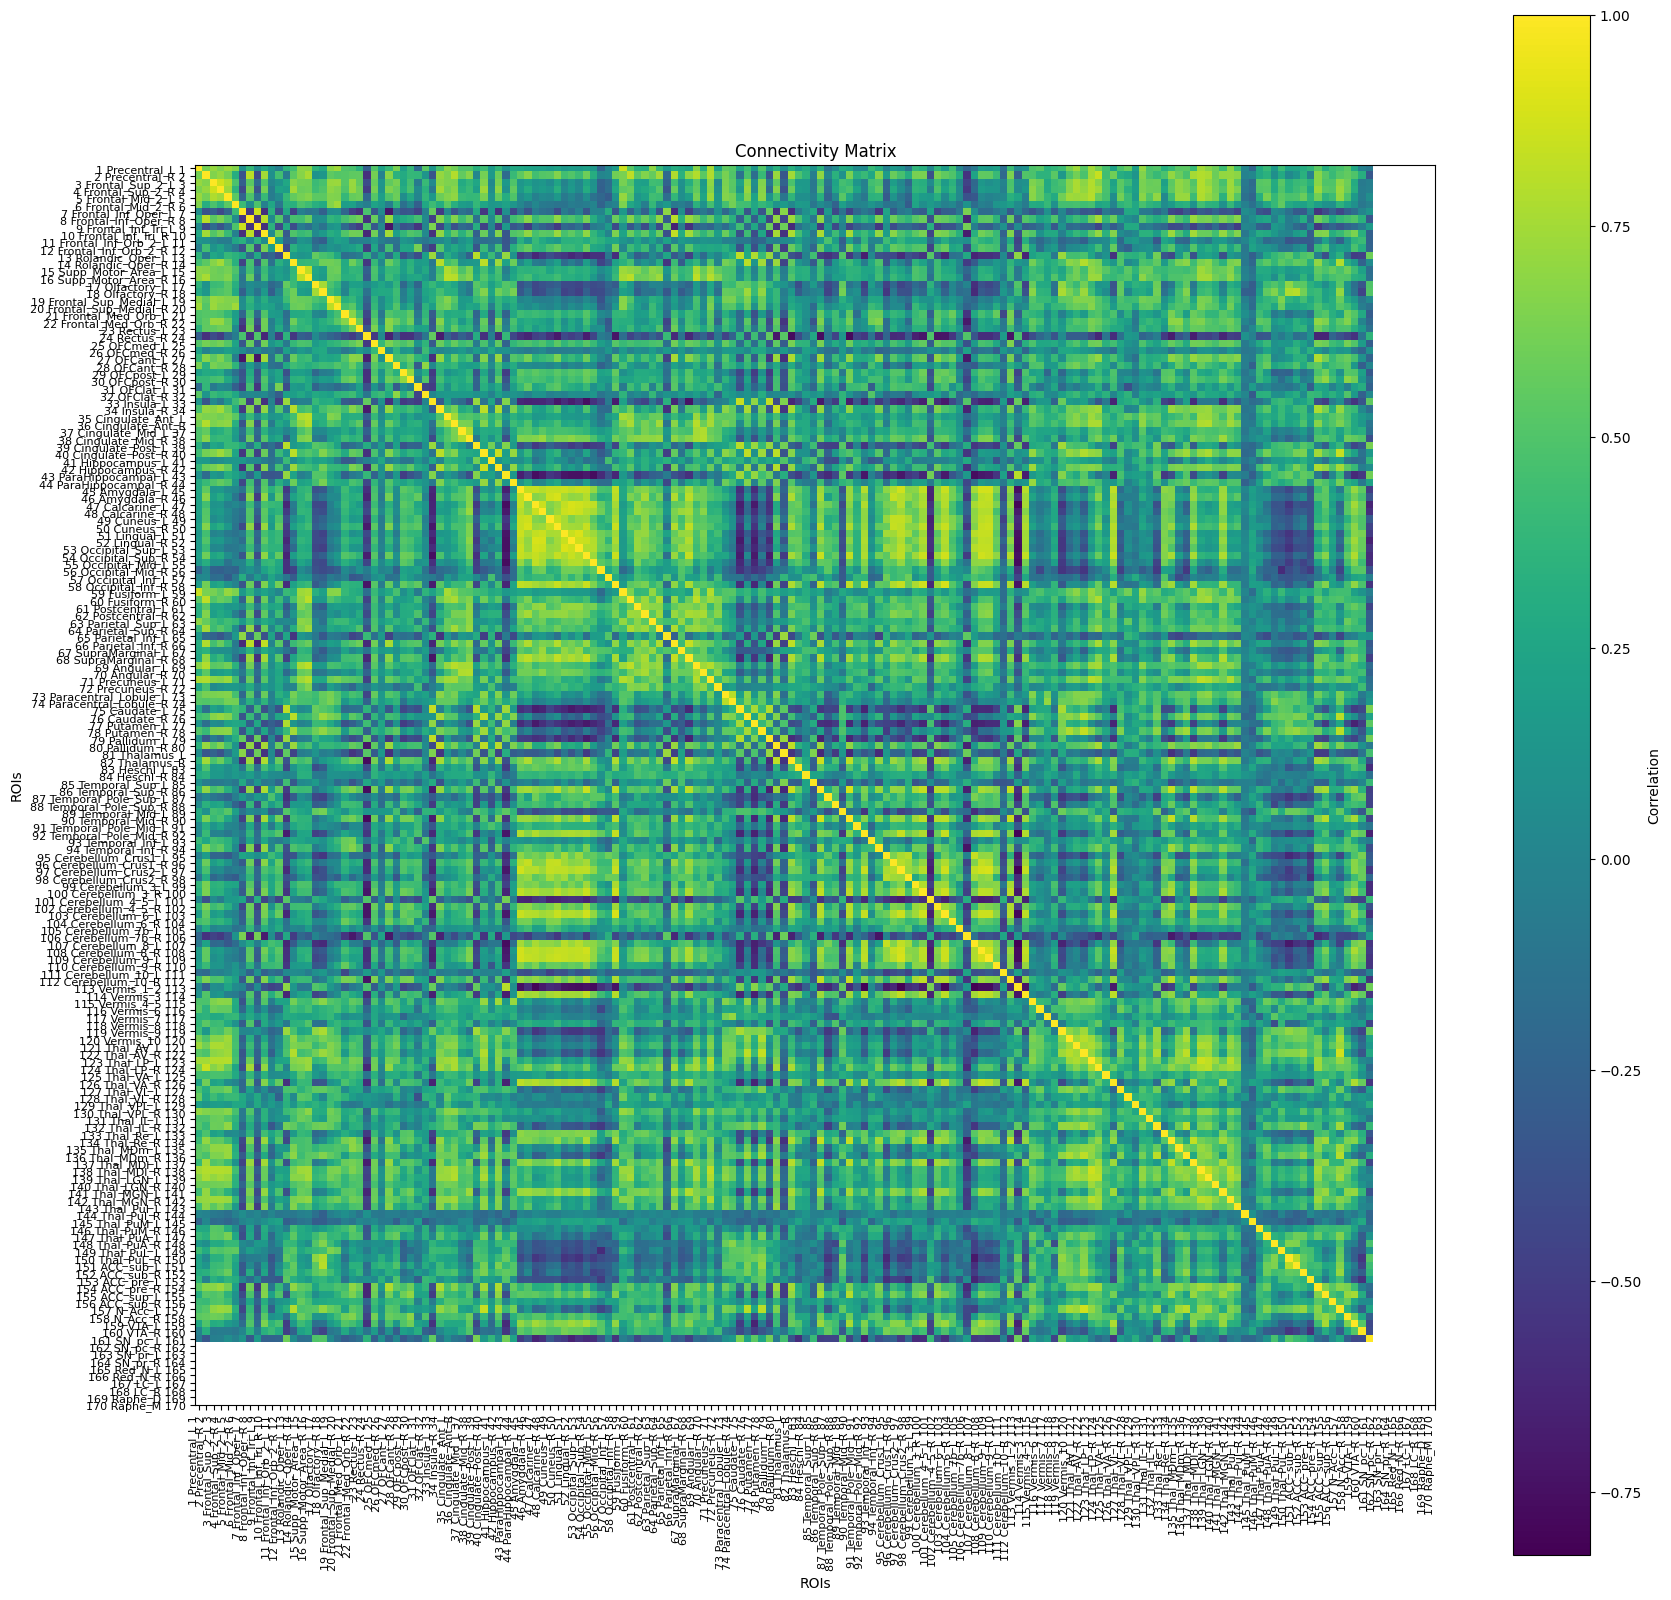

In [12]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix_fu, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [13]:
male_FU = connectivity_matrix_fu

%store male_FU

np.savez('male_FU.npz', data = male_FU)

Stored 'male_FU' (ndarray)


In [14]:
size1 = male_BL.size
size2 = male_FU.size
print(size1, size2)

27556 25921


In [15]:
print("Time series length for first dataset:", len(time_series))
print("Time series length for second dataset:", len(time_series_fu))

Time series length for first dataset: 140
Time series length for second dataset: 140


In [16]:
print("Number of ROIs for first dataset:", time_series.shape[1])
print("Number of ROIs for second dataset:", time_series_fu.shape[1])


Number of ROIs for first dataset: 166
Number of ROIs for second dataset: 161


In [17]:
from nilearn import datasets
import numpy as np

# Fetch the AAL atlas to get the full list of ROI indices and labels
#aal_atlas = datasets.fetch_atlas_aal()
#roi_labels = aal_atlas.labels  # Names of all ROIs in the AAL atlas
#total_rois = list(range(len(roi_labels)))  # Indices of all ROIs in the AAL atlas

# Assume 'time_series' is your data from the first dataset
# and 'time_series_fu' is your data from the second dataset
# (you might need to adjust the names according to your actual data)

# Extract the ROI indices from the time series data
roi_indices_first = list(range(time_series.shape[1]))
roi_indices_second = list(range(time_series_fu.shape[1]))

# Find the missing ROIs in the first dataset
missing_in_first = set(roi_indices_second) - set(roi_indices_first)

# Print the ROI lists for each dataset
print("ROI indices in the first dataset:", roi_indices_first)
print("ROI indices in the second dataset:", roi_indices_second)

# Print the missing ROI indices and corresponding names
print("Missing ROI indices in the first dataset:", sorted(list(missing_in_first)))

missing_roi_labels = [roi_labels[i] for i in sorted(missing_in_first)]
print("Missing ROI labels in the first dataset:", missing_roi_labels)


ROI indices in the first dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
ROI indices in the second dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,

In [18]:
# Remove these missing ROIs from the second dataset, and perform the computation of K

In [19]:
#from nilearn import datasets, connectome, input_data
#import numpy as np

# Define the path to the NIfTI file
#nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/801_resting_state_fmri.nii.gz"

# Load the AAL atlas
#aal_atlas = datasets.fetch_atlas_aal()
#roi_labels = aal_atlas.labels  # All ROI names

# List of ROIs to remove
#rois_to_remove = ['Vermis_9', 'Vermis_10']
#rois_to_remove = ['VTA_R 160'] # 161 SN_pc_L 161

# Get the indices of the ROIs to remove
#rois_to_remove_indices = [i for i, label in enumerate(roi_labels) if label in rois_to_remove]

# Create a mask to retain only the ROIs not in 'rois_to_remove_indices'
#keep_mask = [i for i in range(len(roi_names)) if i not in rois_to_remove_indices]

# Apply the "keep mask" to filter the connectivity matrix
# Keep only the rows and columns that are in 'keep_mask'
#connectivity_matrix_filtered_fu = connectivity_matrix_fu[keep_mask, :][:, keep_mask]

#print("Filtered Connectivity Matrix:", connectivity_matrix_filtered)

# Visualize the filtered connectivity matrix
#import matplotlib.pyplot as plt
#plt.imshow(connectivity_matrix_filtered_fu, cmap='viridis', interpolation='nearest')
#plt.colorbar(label='Correlation')
#plt.title('Filtered Connectivity Matrix')
#plt.xlabel('ROIs')
#plt.ylabel('ROIs')
#plt.show()


Filtered Connectivity Matrix:
 [[1.         0.5877435  0.56151592 ... 0.43665186 0.17064968 0.40652513]
 [0.5877435  1.         0.6188551  ... 0.36917056 0.100682   0.38751077]
 [0.56151592 0.6188551  1.         ... 0.49119341 0.1939778  0.58322767]
 ...
 [0.43665186 0.36917056 0.49119341 ... 1.         0.23812449 0.45164521]
 [0.17064968 0.100682   0.1939778  ... 0.23812449 1.         0.21138802]
 [0.40652513 0.38751077 0.58322767 ... 0.45164521 0.21138802 1.        ]]


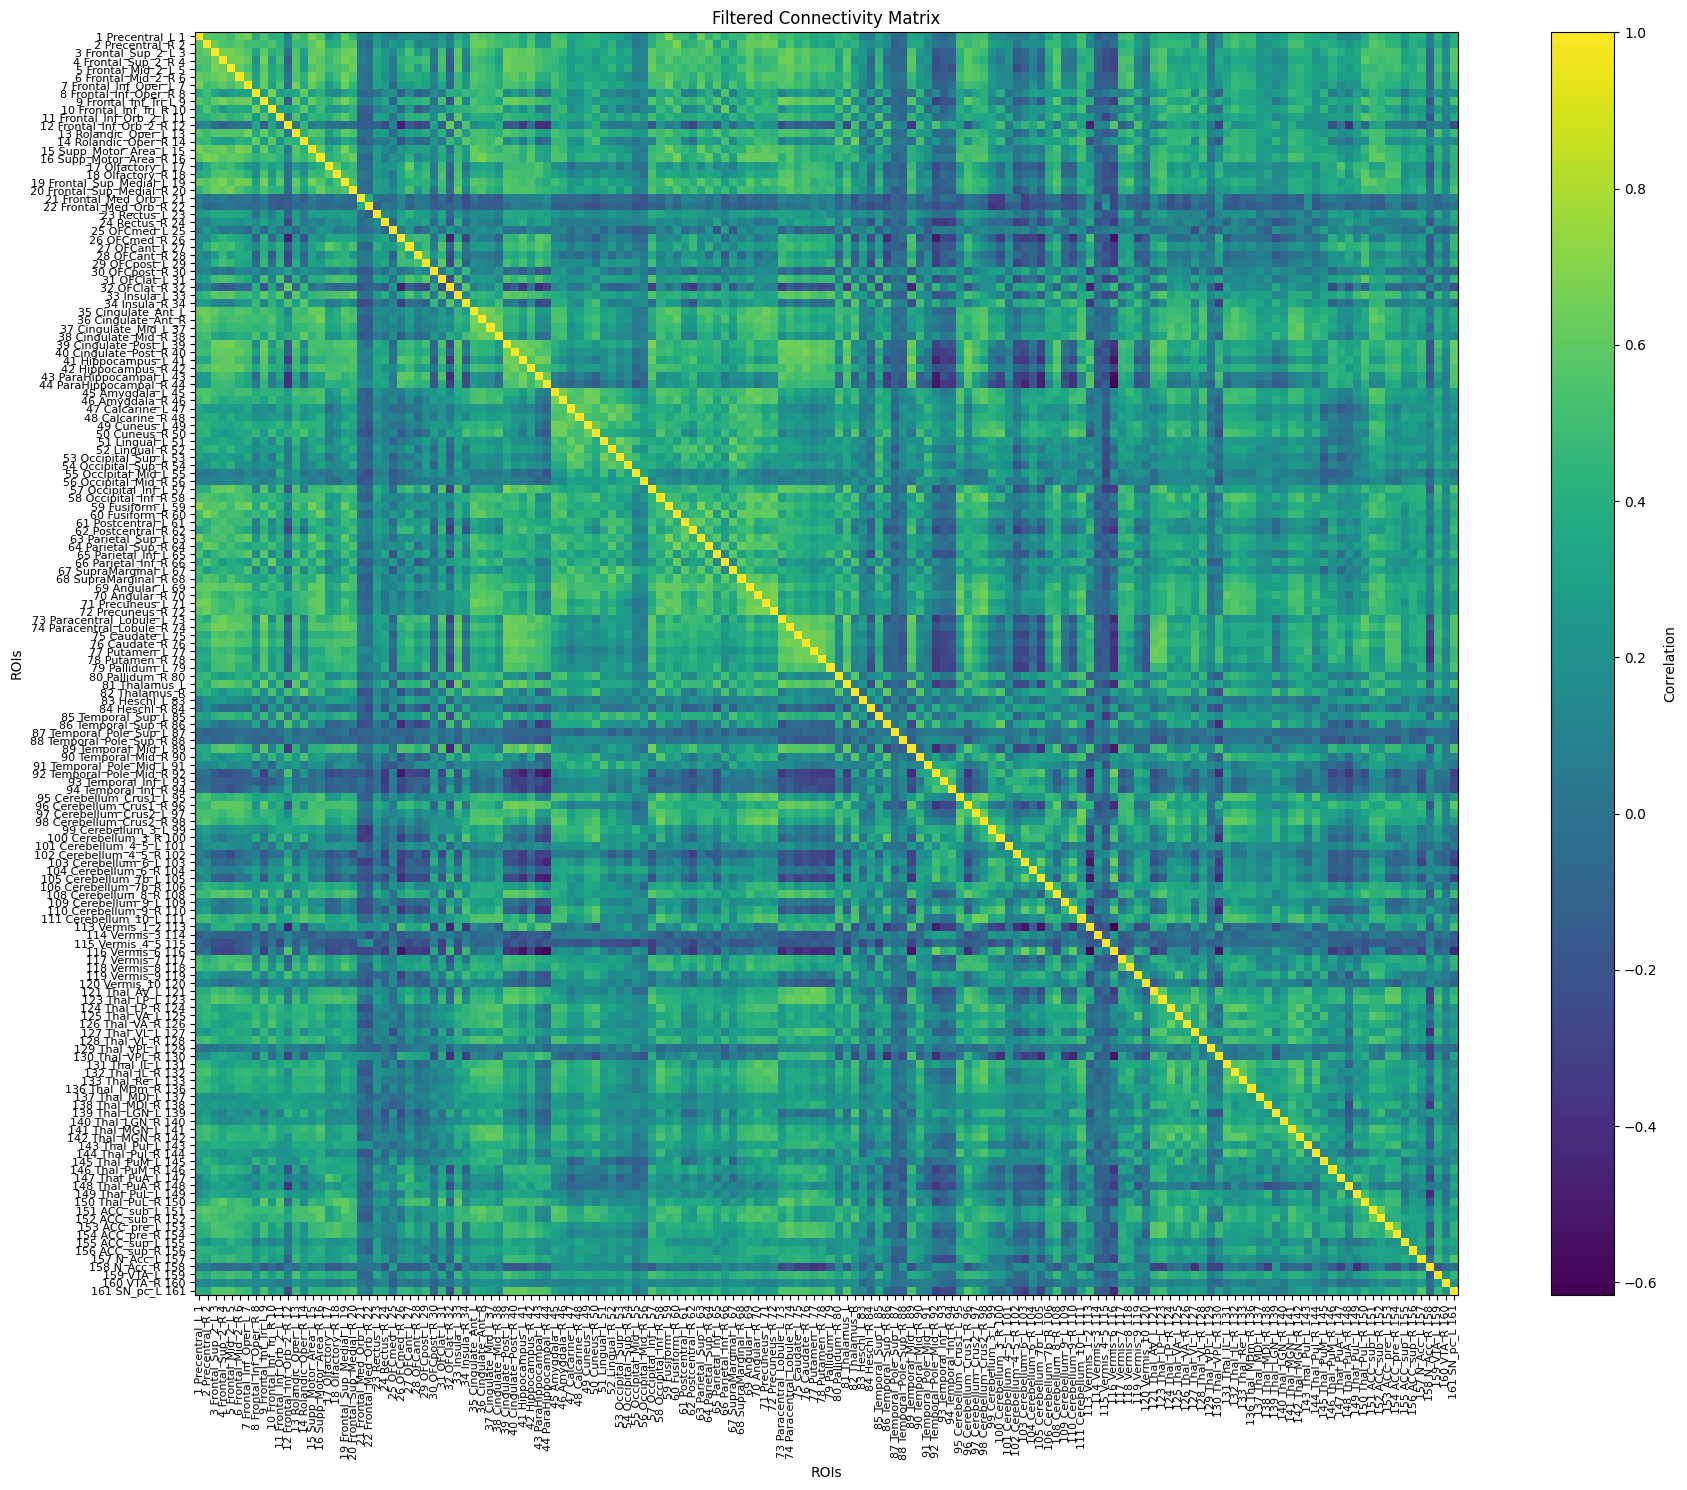

In [20]:
from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa/output.nii.gz/501_resting_state_fmri.nii.gz"



# List of ROIs to filter out
rois_to_filter_out = [106, 111, 121, 133, 134, 164, 167, 168, 170, 161, 162]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series_fu, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series = time_series[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Print the filtered connectivity matrix
print("Filtered Connectivity Matrix:\n", connectivity_matrix)

# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix.npy', connectivity_matrix)

male_BL = connectivity_matrix


In [21]:
#from nilearn import datasets, input_data, connectome
#import numpy as np
#import matplotlib.pyplot as plt

# Define the path to the NIfTI file
#nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/801_resting_state_fmri.nii.gz"


# List of ROIs to keep (first 161)
#rois_to_keep_indices = list(range(160))

# Create a masker using NiftiLabelsMasker
#masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
#time_series_fu = masker.fit_transform(nifti_file_fu)

# Compute the connectivity matrix
#correlation_measure_FU = connectome.ConnectivityMeasure(kind='correlation')
#connectivity_matrix_FU = correlation_measure_FU.fit_transform([time_series_fu])[0]

# Apply the "keep mask" to filter the connectivity matrix
#connectivity_matrix_filtered_FU = connectivity_matrix_FU[rois_to_keep_indices, :][:, rois_to_keep_indices]

# Print the filtered connectivity matrix
#print("Filtered Connectivity Matrix:\n", connectivity_matrix_filtered_FU)

# Visualize the filtered connectivity matrix
#plt.figure(figsize=(10, 8))
#plt.imshow(connectivity_matrix_filtered_FU, cmap='viridis', interpolation='nearest')
#plt.colorbar(label='Correlation')
#plt.title('Filtered Connectivity Matrix')
#plt.xlabel('ROIs')
#plt.ylabel('ROIs')
#plt.xticks(ticks=np.arange(len(rois_to_keep_indices)), labels=[roi_names[i] for i in rois_to_keep_indices], rotation=90, fontsize=8)
#plt.yticks(ticks=np.arange(len(rois_to_keep_indices)), labels=[roi_names[i] for i in rois_to_keep_indices], fontsize=8)
#plt.tight_layout()
#plt.show()

# Save the filtered connectivity matrix to a file
#np.save('filtered_connectivity_matrix_FU.npy', connectivity_matrix_filtered_FU)


In [22]:
#connectivity_matrix_filtered_FU.size

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {134, 167, 168, 106, 111}. Label image only contains 162 labels (including background).
  warnings.warn(


Filtered Connectivity Matrix:
 [[1.         0.5877435  0.56151592 ... 0.43665186 0.17064968 0.40652513]
 [0.5877435  1.         0.6188551  ... 0.36917056 0.100682   0.38751077]
 [0.56151592 0.6188551  1.         ... 0.49119341 0.1939778  0.58322767]
 ...
 [0.43665186 0.36917056 0.49119341 ... 1.         0.23812449 0.45164521]
 [0.17064968 0.100682   0.1939778  ... 0.23812449 1.         0.21138802]
 [0.40652513 0.38751077 0.58322767 ... 0.45164521 0.21138802 1.        ]]


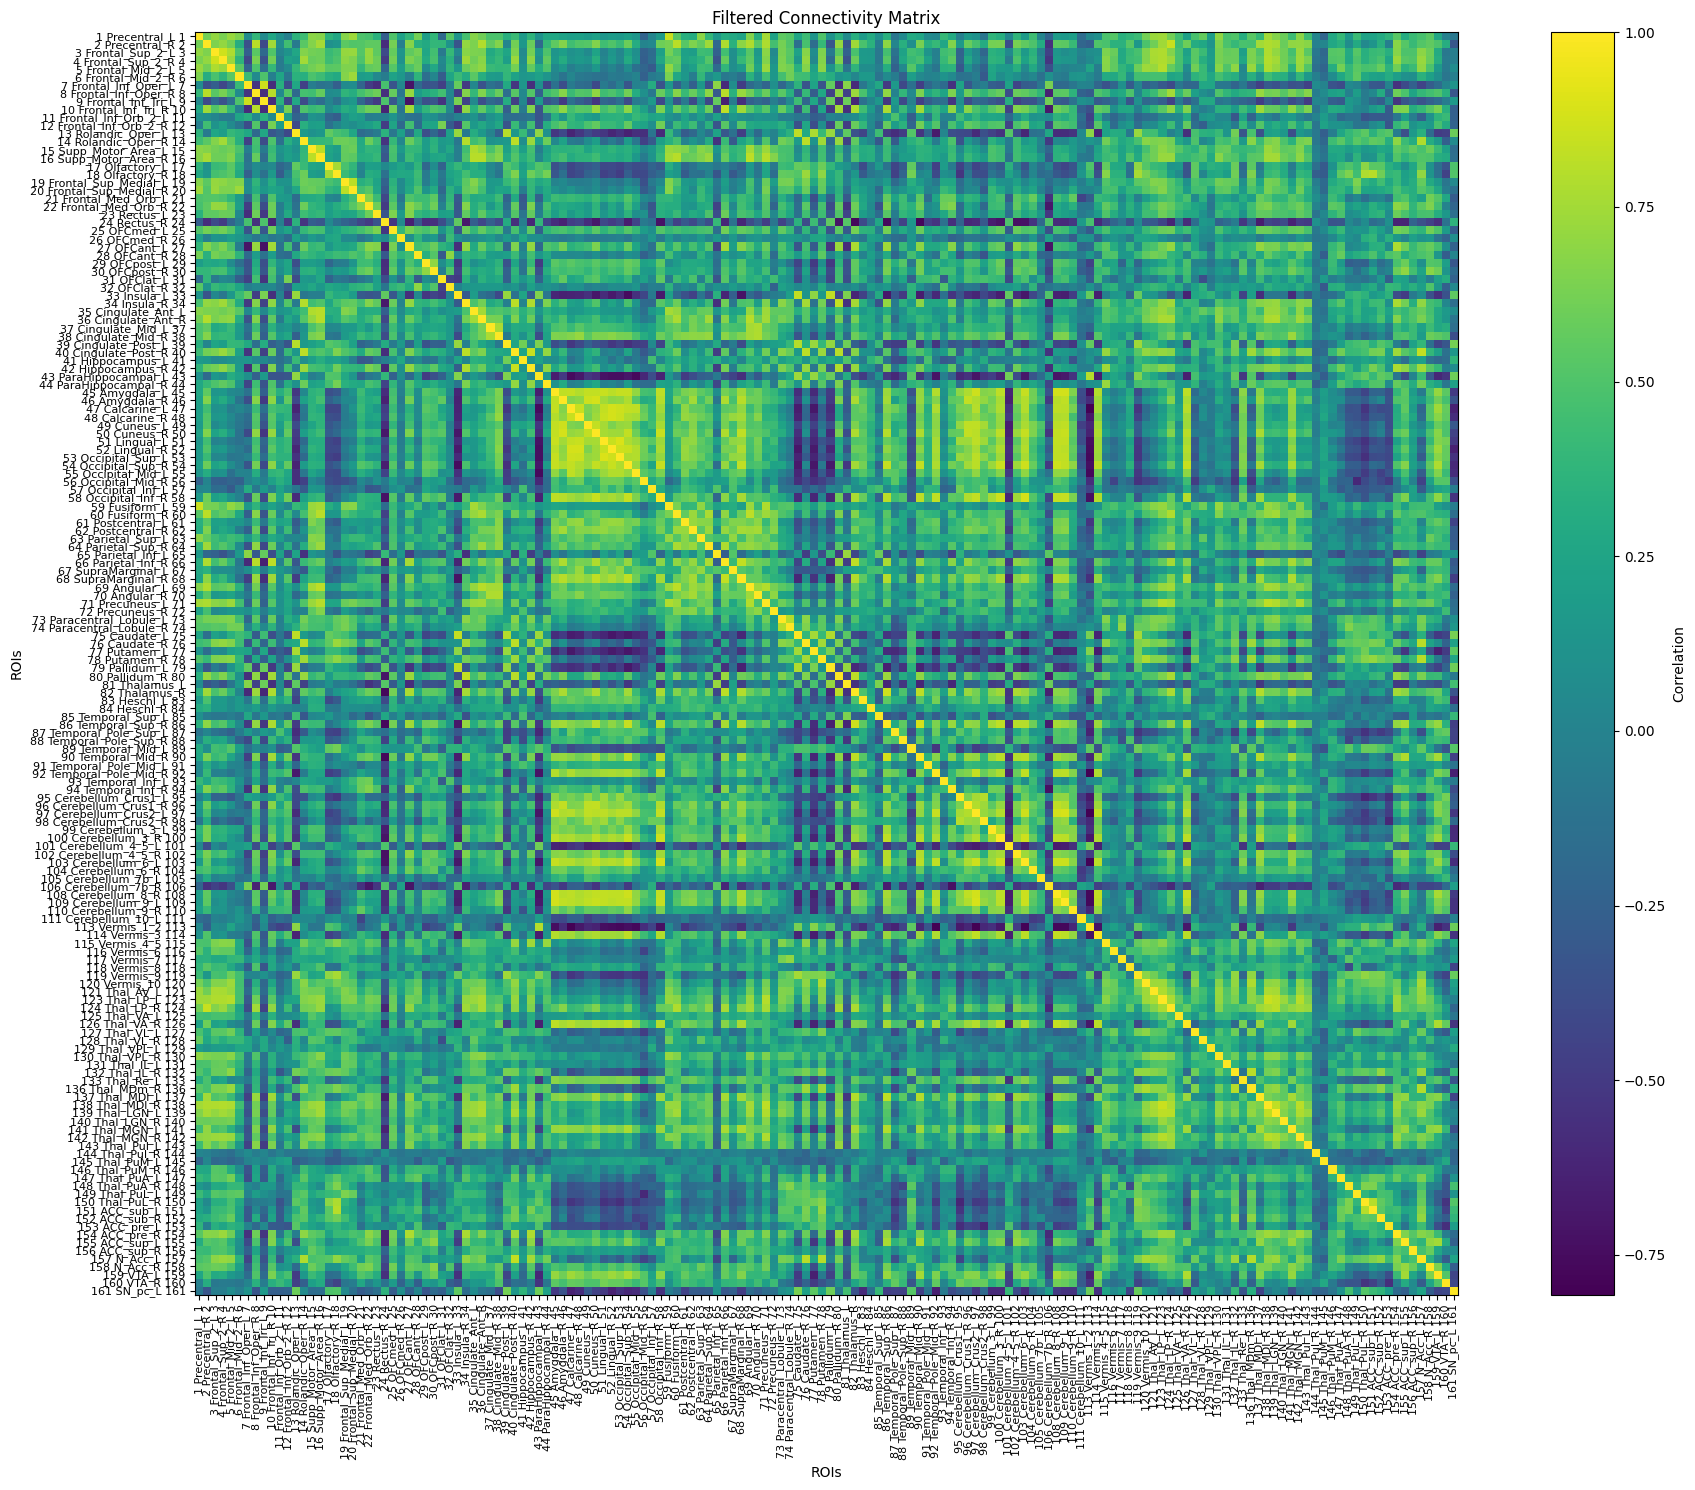

In [23]:


from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the NIfTI file
#nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/801_resting_state_fmri.nii.gz"
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/501_resting_state_fmri.nii.gz"


# List of ROIs to filter out
rois_to_filter_out = [106, 111, 121, 133, 134, 164, 167, 168, 170, 161, 162]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series_fu = masker.fit_transform(nifti_file_fu)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series_fu, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_fu = time_series_fu[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_fu = correlation_measure_fu.fit_transform([filtered_time_series_fu])[0]

# Print the filtered connectivity matrix
print("Filtered Connectivity Matrix:\n", connectivity_matrix)

# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix_fu, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix.npy', connectivity_matrix_fu)

male_FU = connectivity_matrix_fu


In [24]:
#from nilearn import datasets, input_data, connectome
#import numpy as np
#import matplotlib.pyplot as plt

# Define the path to the NIfTI file
#nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa/output.nii.gz/501_resting_state_fmri.nii.gz"


# List of ROIs to keep (first 161)
#rois_to_keep_indices = list(range(160))

# Create a masker using NiftiLabelsMasker
#masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
#time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix
#correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
#connectivity_matrix = correlation_measure.fit_transform([time_series])[0]

# Apply the "keep mask" to filter the connectivity matrix
#connectivity_matrix_filtered_BL = connectivity_matrix[rois_to_keep_indices, :][:, rois_to_keep_indices]

# Print the filtered connectivity matrix
#print("Filtered Connectivity Matrix:\n", connectivity_matrix_filtered_BL)

# Visualize the filtered connectivity matrix
#plt.figure(figsize=(10, 8))
#plt.imshow(connectivity_matrix_filtered_BL, cmap='viridis', interpolation='nearest')
#plt.colorbar(label='Correlation')
#plt.title('Filtered Connectivity Matrix')
#plt.xlabel('ROIs')
#plt.ylabel('ROIs')
#plt.xticks(ticks=np.arange(len(rois_to_keep_indices)), labels=[roi_names[i] for i in rois_to_keep_indices], rotation=90, fontsize=8)
#plt.yticks(ticks=np.arange(len(rois_to_keep_indices)), labels=[roi_names[i] for i in rois_to_keep_indices], fontsize=8)
#plt.tight_layout()
#plt.show()

# Save the filtered connectivity matrix to a file
#np.save('filtered_connectivity_matrix.npy', connectivity_matrix_filtered_BL)


In [25]:
#connectivity_matrix_filtered_BL.size

In [26]:
#male_BL = connectivity_matrix_filtered_BL

%store male_BL

np.savez('male_BL.npz', data = male_BL)

#male_FU = connectivity_matrix_filtered_FU

%store male_FU

np.savez('male_FU.npz', data = male_FU)

Stored 'male_BL' (ndarray)
Stored 'male_FU' (ndarray)


In [27]:
# K for 002_S_5018 with the AAL atlas

#male_FU = connectivity_matrix_filtered_FU
#male_BL = connectivity_matrix_filtered_BL


K_ = male_FU * np.linalg.inv(male_BL)

#K_ = male_FU @ np.linalg.inv(male_BL)




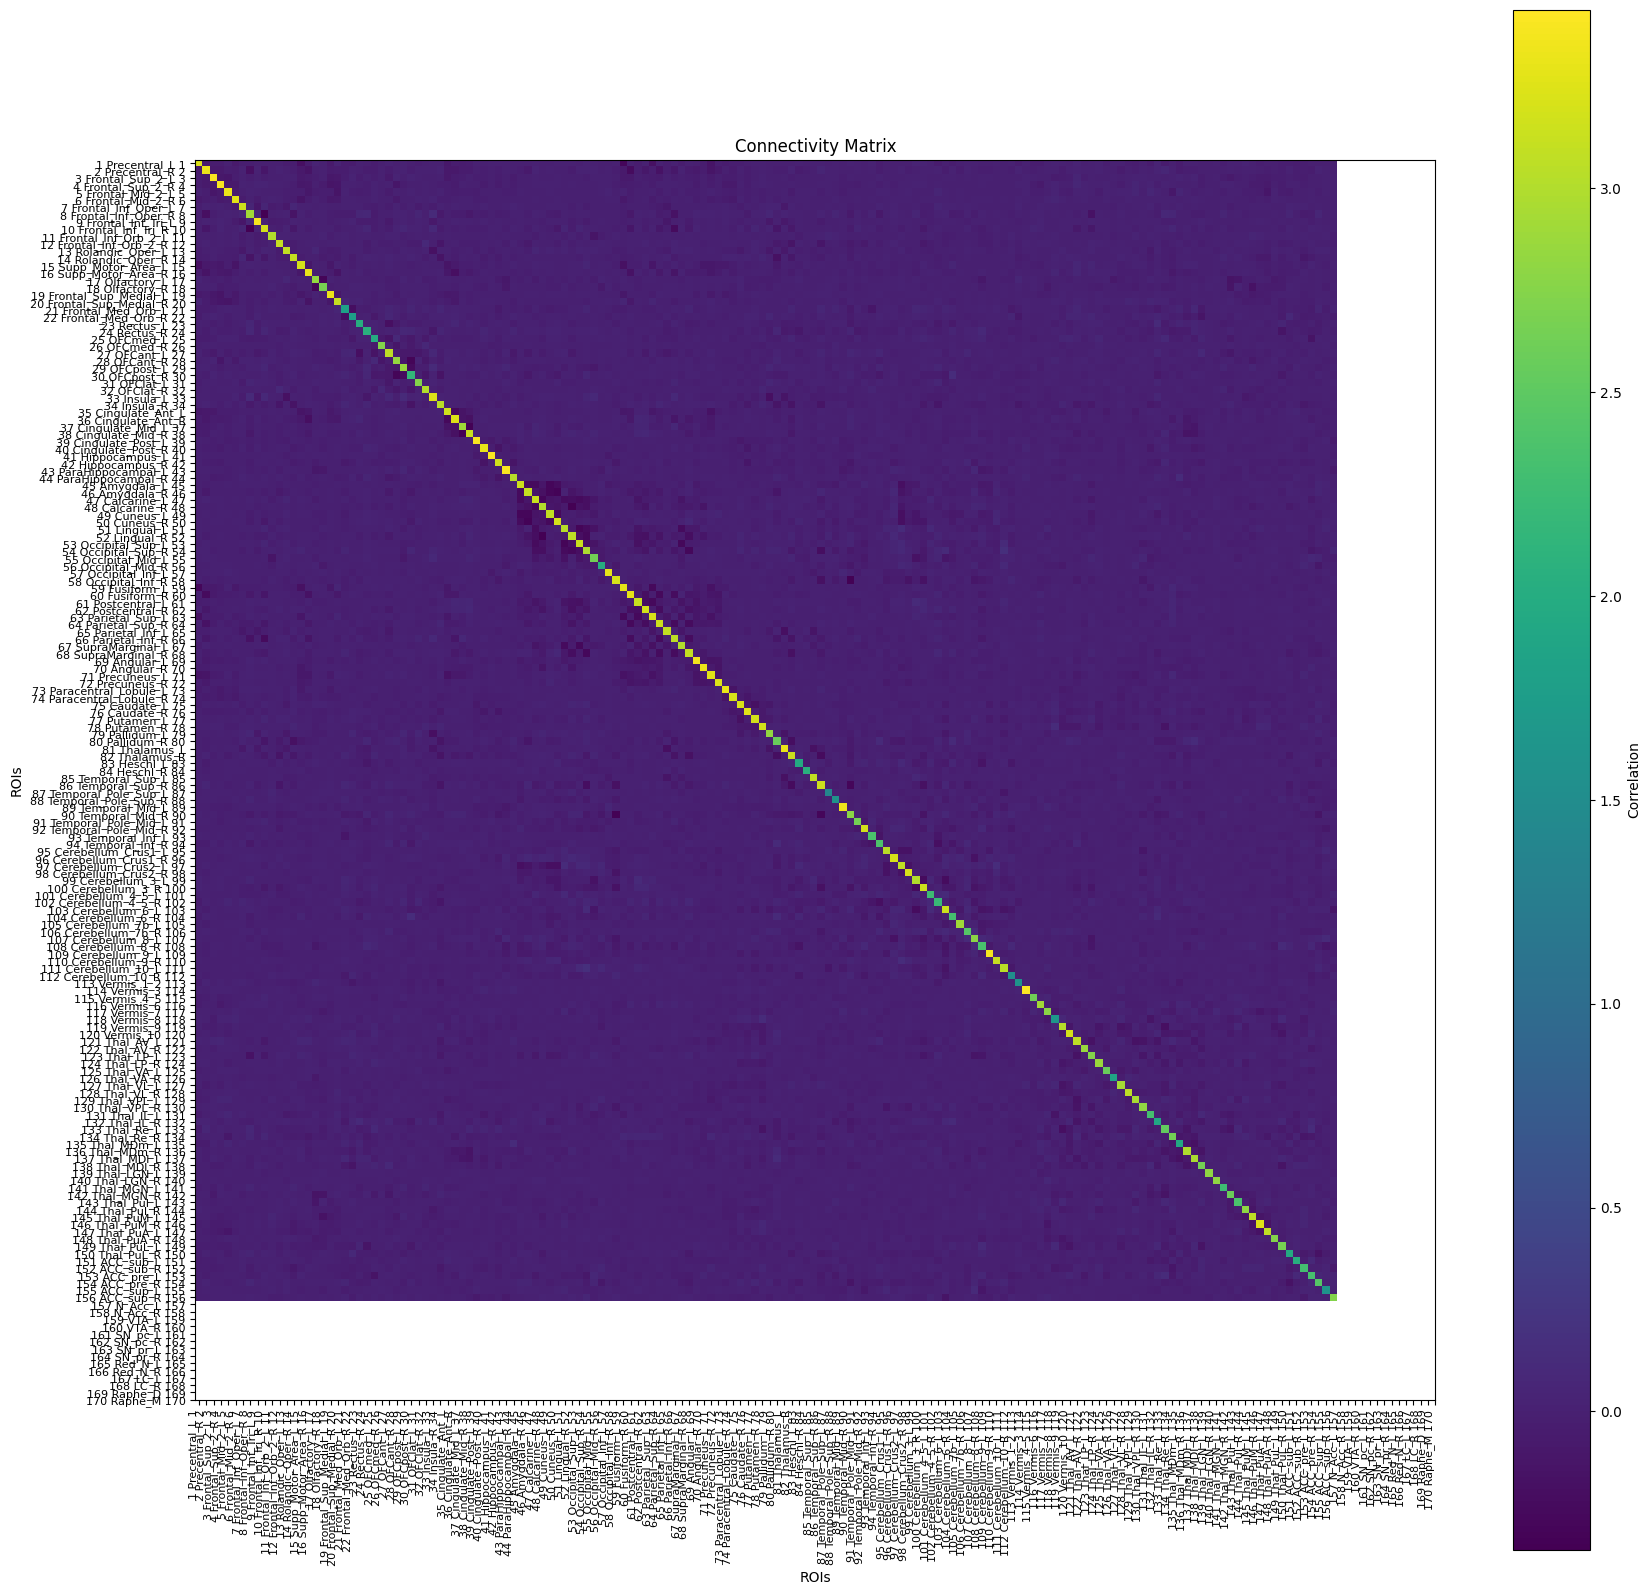

In [28]:
# Visualize K



# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

plt.imshow(K_, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [31]:
# filtering out the smaller elements

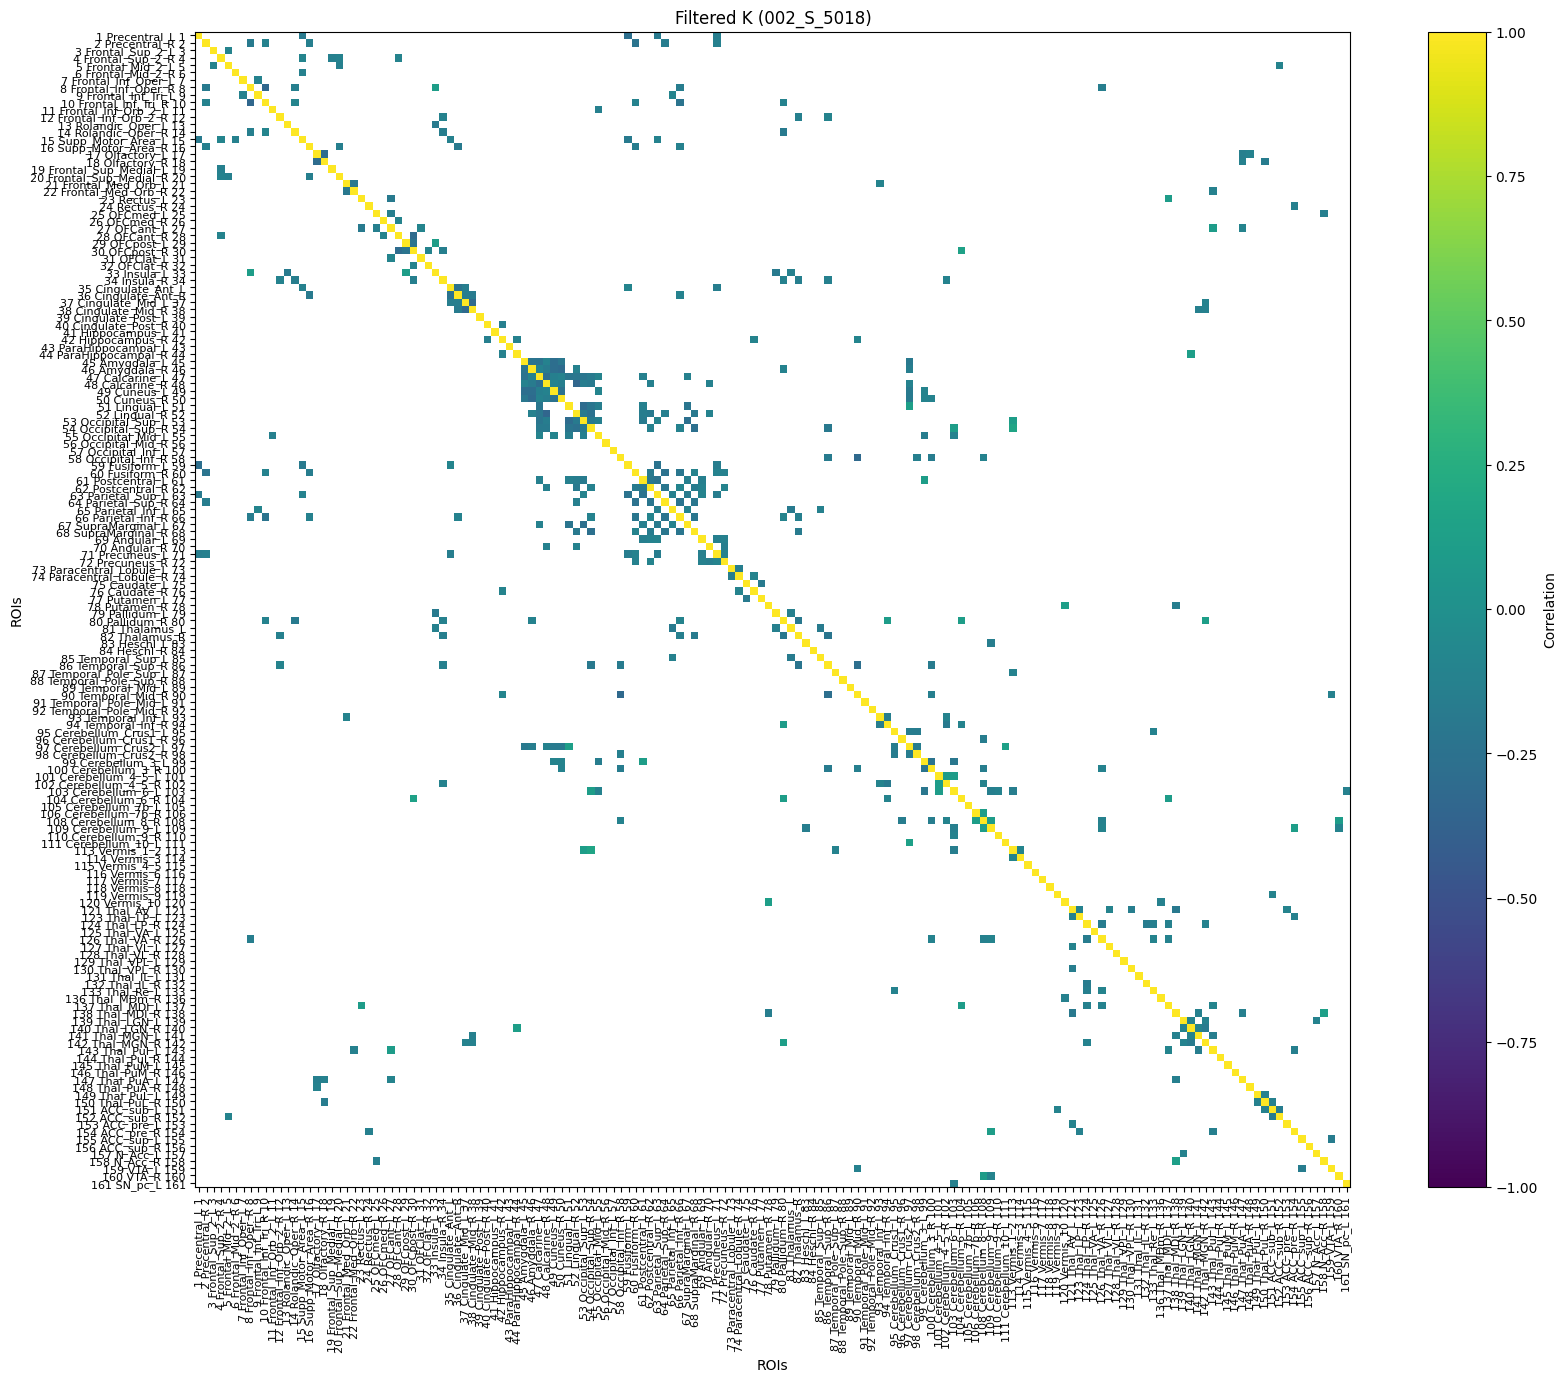

In [35]:
# Set the threshold
#threshold = 1.6
#threshold = 0.09
threshold = 0.1

# Create a boolean mask for the condition
mask = np.abs(K_) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix = np.where(mask, K_, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 15))

vmin, vmax = -1, 1  # Adjust these values as needed for your data
plt.imshow(filtered_matrix, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Correlation')
plt.title('Filtered K (002_S_5018)')

#plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
#plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.savefig('K_AAL3_filtered_ADNI_002_S_5018.png', dpi=300)
#plt.savefig('K_AAL3_filtered_ADNI_002_S_5018_product1.png', dpi=300)
plt.savefig('K_AAL3_filtered_ADNI_002_S_5018.pdf', dpi=300)
#plt.savefig('K_AAL3_filtered_ADNI_002_S_5018_product1.pdf', dpi=300)
plt.show()


Eigenvalues:
[1.18002601 1.31989119 1.37482387 1.39639767 1.43923655 1.47674911
 1.50131635 1.53066018 1.54732991 1.57741269 1.62487545 1.64752735
 1.71745578 1.73229943 1.76265522 1.79371843 1.80837708 1.85703798
 1.8750522  1.9051122  2.03767818 1.9674011  1.98231998 2.01064891
 2.16049922 2.1496296  2.07128969 2.08367273 2.12222527 2.10423649
 2.20822151 2.2212907  2.24871923 2.29106232 2.2839784  2.33014602
 2.34628834 2.36179589 2.35506834 2.45443894 2.43981263 2.39604325
 2.54751418 2.50640863 2.49323378 2.60032081 2.55699724 2.56886584
 2.56415223 2.68258659 2.65827795 2.62867635 2.63851549 2.7147137
 2.71911564 2.73030386 2.75974054 2.75270999 2.77641328 2.7897346
 2.80348883 2.81290906 2.8362741  2.8378027  2.87291365 2.87833777
 2.89465685 2.90194913 2.91478278 2.95783138 2.9366518  2.94218061
 3.59870806 3.58098913 2.98317212 2.99270873 2.97559872 2.9738213
 3.01318353 3.03985176 3.04580034 3.57162143 3.56759523 3.56639602
 3.05714235 3.0651268  3.06068746 3.08283788 3.09539

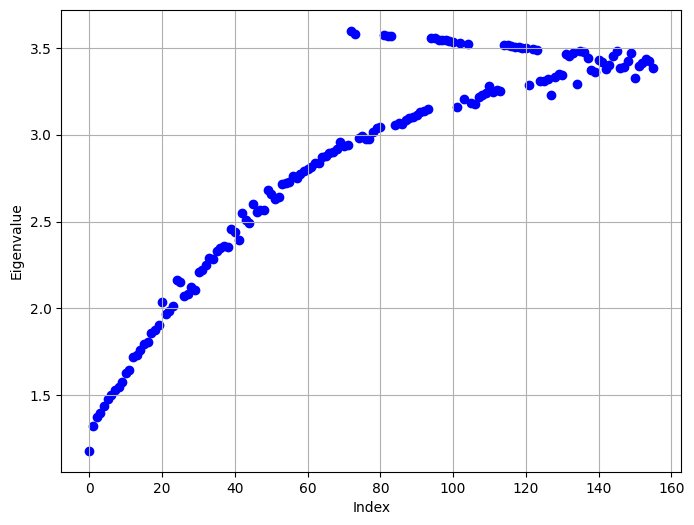

In [184]:
# eigenvalues

w, v = np.linalg.eig(K_)

print("Eigenvalues:")
print(w)

print("\nEigenvectors:")
print(v)

# Plot eigenvalues
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(w)), w, color='b', label='Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
#plt.title('Eigenvalues of Matrix A')
plt.grid(True)
#plt.savefig('eigenvalues@AD_case_patient_B.pdf')
plt.savefig('eigenvaluesAD_case_patient_B.pdf')
plt.show()


In [185]:
# major effects: occipital and the other areas; hippocampus and cerebellum; temporal and cerebellum; cerebellum and vermis

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {134, 167, 168, 106, 111}. Label image only contains 162 labels (including background).
  warnings.warn(


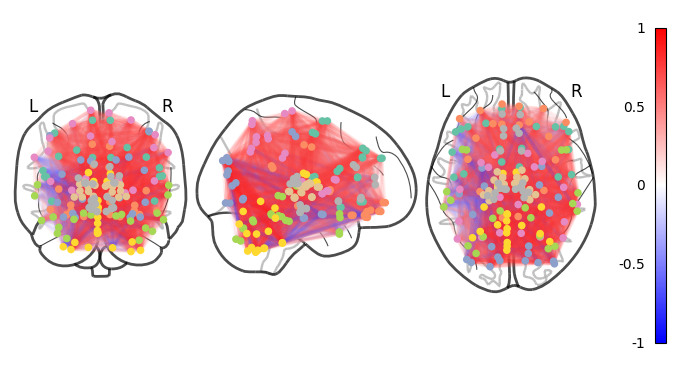

In [186]:
#

# June 3: print the connectome with the AAL3 atlas

#

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/501_resting_state_fmri.nii.gz" # 801
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = [coords[i] for i in non_empty_indices]

# Plot the connectome
edge_properties = {
    'alpha': 0.1 # 0 is completely transparent, 1 is opaque
}

node_size = 20  # Adjust this value to change node size


plotting.plot_connectome(connectivity_matrix, filtered_coords, edge_threshold="0%", edge_vmin = -1, edge_vmax = 1, edge_kwargs=edge_properties, node_size = node_size, colorbar=True)

# edge_threshold="98%",
# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plotting.show()


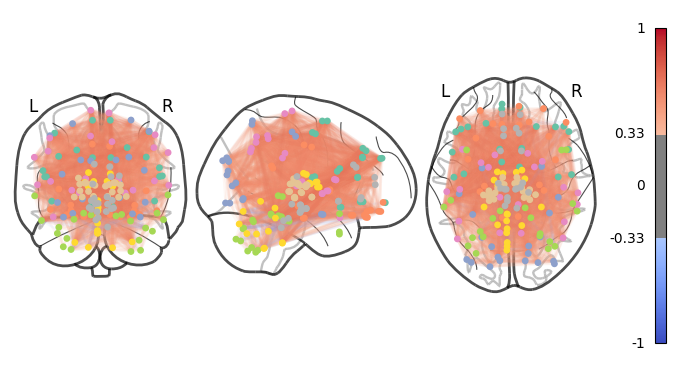

In [187]:
from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aa/output.nii.gz/501_resting_state_fmri.nii.gz"
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = np.array([coords[i] for i in non_empty_indices])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.1 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix,
    filtered_coords,
    # edge_threshold="80%",
    edge_threshold="60%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plt.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {134, 167, 168, 106, 111}. Label image only contains 162 labels (including background).
  warnings.warn(


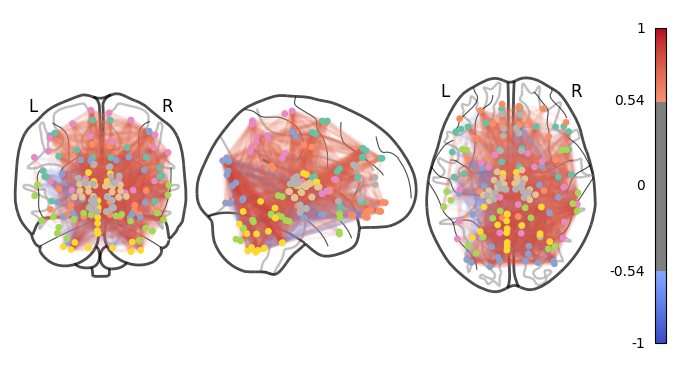

In [188]:
# follow-up

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/501_resting_state_fmri.nii.gz" # 501

aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series_fu = masker.fit_transform(nifti_file_fu)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois_fu = np.any(time_series_fu, axis=0)
non_empty_indices_fu = np.where(non_empty_rois_fu)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series_fu = time_series_fu[:, non_empty_indices_fu]

# Compute the connectivity matrix
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_fu = correlation_measure.fit_transform([filtered_time_series_fu])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords_fu = np.array([coords[i] for i in non_empty_indices_fu])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.1 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix_fu,
    filtered_coords_fu,
    edge_threshold="80%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome_FU.png', dpi=300)
plt.show()


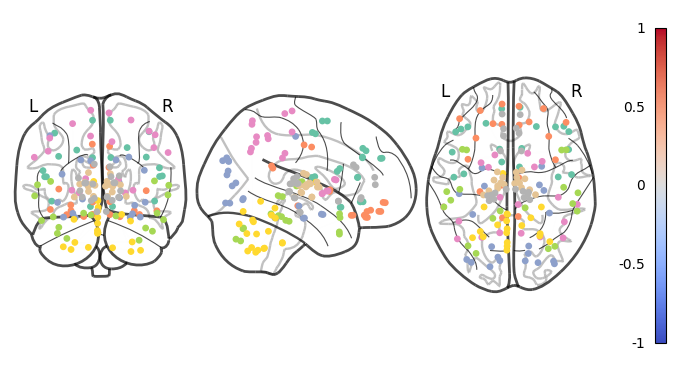

In [194]:
# identify which ROIs are above threshold in K


#threshold = 0.2
threshold = 0.1
#threshold = 0.09

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_BL, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix = np.where(mask_new, male_BL, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 0.003 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix,
    filtered_coords_selected,
    #edge_threshold="0%",
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_baseline_connectome_selected_patient_B.pdf')
plt.show()


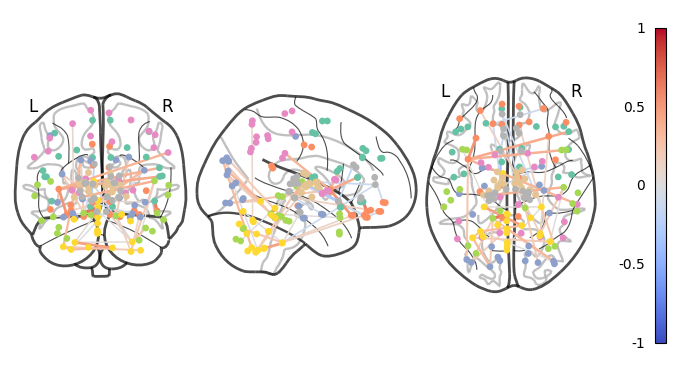

In [199]:
# identify which ROIs are above threshold in K


#threshold = 0.2
threshold = 0.09

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_BL, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix = np.where(mask_new, male_BL, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 1 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix,
    filtered_coords_selected,
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_baseline_connectome_selected_patient_B.pdf')
plt.show()


AttributeError: 'GlassBrainAxes' object has no attribute 'cmap'

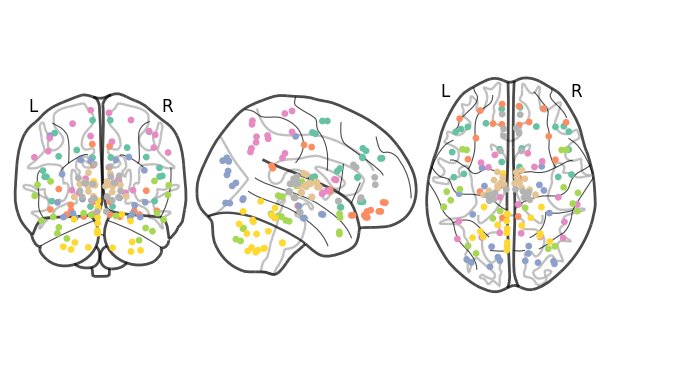

In [200]:
# identify which ROIs are above threshold in K


#threshold = 0.2
threshold = 0.09

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_FU, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix = np.where(mask_new, male_FU, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 1 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix_fu,
    filtered_coords_selected,
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_fu_connectome_selected_patient_B.pdf')
plt.show()


AttributeError: 'GlassBrainAxes' object has no attribute 'cmap'

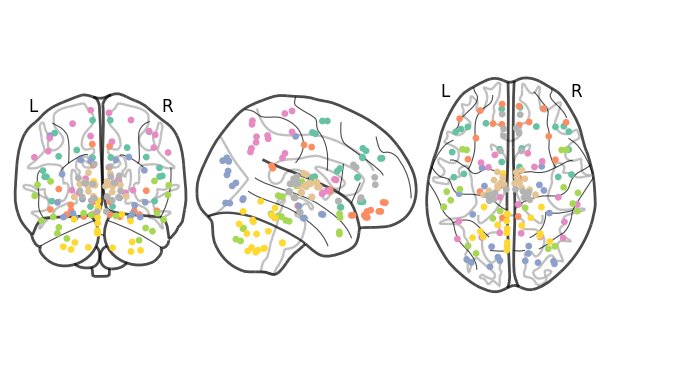

In [190]:
# identify which ROIs are above threshold in K


threshold = 0.2

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_BL, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix = np.where(mask_new, male_BL, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 0.8 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix,
    filtered_coords_selected,
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_baseline_connectome_selected_patient_B.pdf')
plt.show()


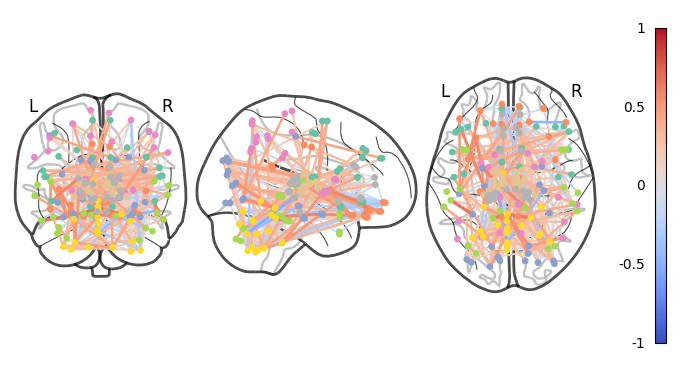

In [234]:
# identify which ROIs are above threshold in K


threshold = 0.05

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_BL, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix = np.where(mask_new, male_BL, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 1 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix,
    filtered_coords_selected,
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_baseline_connectome_selected_patient_B.pdf')
plt.show()


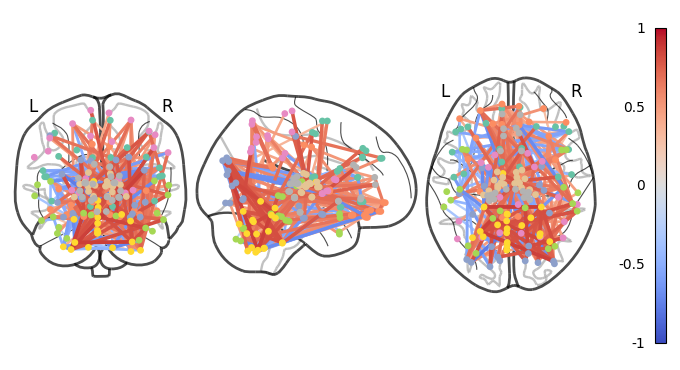

In [237]:
# identify which ROIs are above threshold in K

threshold = 0.05

rois_above_threshold = np.argwhere(K_ > threshold)
rois_set_ = set(rois_above_threshold.flatten())

# Store them
#roi_names_selected = [f'ROI_{i}' for i in range(162)] # filtered_coords
roi_names_selected = [f'ROI_{i}' for i in non_empty_indices]
stored_rois = {roi_names_selected[i] for i in rois_set_}

# Filter the connectivity matrix accordingly

# Create a boolean mask for filtering the connectivity matrix
mask_new = np.zeros_like(male_FU, dtype=bool) # male_BL, male_FU

for (i, j) in rois_above_threshold:
    if roi_names_selected[i] in stored_rois and roi_names_selected[j] in stored_rois:
        mask_new[i, j] = True

selection_connectivity_matrix_fu = np.where(mask_new, male_FU, 0) # not the whole one, connectivity_matrix
filtered_coords_selected = filtered_coords[list(rois_set_)]

# visualize the connectome with this filtering:

node_size = 15  # Adjust this value to change node size

edge_properties = {
    'alpha': 1 # 0 is completely transparent, 1 is opaque
}

plotting.plot_connectome(
    selection_connectivity_matrix_fu,
    filtered_coords_selected,
    edge_threshold="0%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('ADNI_AAL3_fu_connectome_selected_patient_B.pdf')
plt.show()


# plotting.plot_connectome(connectivity_matrix_partial, selected_coords,  edge_vmin=-1, edge_vmax=1, edge_threshold="0%", edge_kwargs=edge_properties, colorbar=True)
# plt.savefig('baseline_partial_connectome_ADNI_002_S_5018.pdf', dpi=300)

In [123]:
 # TO UPDATE



from nilearn import datasets

# Fetch the AAL atlas
aal = datasets.fetch_atlas_aal()

# Extract the labels from the AAL atlas
atlas_labels = aal.labels

# List of ROIs to find indices for
roi_names_selection = [
    "Occipital_Mid_R", "Occipital_Inf_L", "Occipital_Inf_R", "Fusiform_L", "Postcentral_R", 
    "Supramarginal_R", "Cerebelum_Crus1_R", "Cerebelum_3_L", "Cerebelum_4_5_R", "Cerebelum_8_L",
    "Cerebelum_9_R", "Cerebelum_10_L", "Cerebelum_10_R", "Vermis_6", "Vermis_7", "Vermis_8", 
    "Cingulum_Post_R", "Frontal_Inf_Tri_R", "Precentral_R", "Frontal_Sup_L", "Heschl_L", 
    "Pallidum_L", "Parietal_Inf_L", "Occipital_Mid_L", "Hippocampus_L", "Hippocampus_R",
    "ParaHippocampal_L", "Temporal_Mid_L", "Temporal_Mid_R", "ParaHippocampal_R"
]

# Get the indices for the specified ROI names
roi_indices_selection = [i for i, label in enumerate(atlas_labels) if label in roi_names_selection]

print("Indices for the specified ROIs:", roi_indices_selection)


Indices for the specified ROIs: [1, 2, 13, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 57, 60, 74, 78, 84, 85, 91, 94, 97, 102, 105, 106, 107, 111, 112, 113]


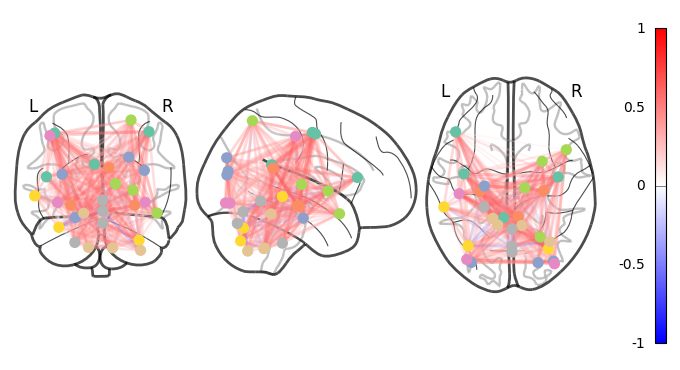

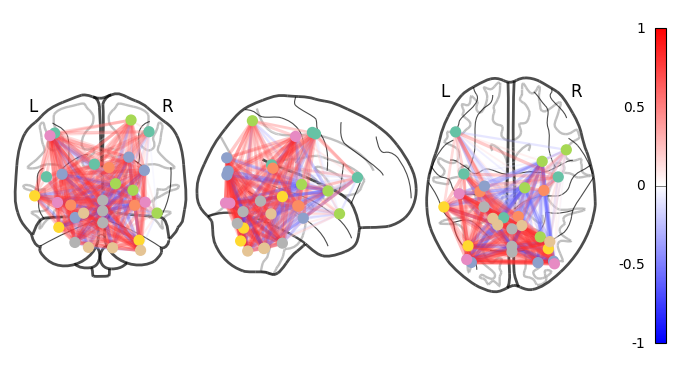

In [191]:
import numpy as np
from nilearn import datasets, plotting, input_data, connectome
import nibabel as nib

# Fetch the AAL atlas
aal_atlas = datasets.fetch_atlas_aal()

# Get the map and labels from the AAL atlas
atlas_filename = aal_atlas['maps']
atlas_labels = aal_atlas['labels']

# Load the NIfTI image to access coordinates
atlas_img = nib.load(atlas_filename)

# The coordinates for each ROI are obtained from the affine transformation
# and the indices where the atlas has a specific ROI value
unique_roi_values = np.unique(atlas_img.get_fdata())
roi_coords = []

# Find the center of each ROI in the atlas
for roi_value in unique_roi_values:
    if roi_value != 0:  # Skip background (value 0)
        roi_indices = np.argwhere(atlas_img.get_fdata() == roi_value)
        roi_center = np.mean(roi_indices, axis=0)  # Compute the mean position
        roi_coords.append(nib.affines.apply_affine(atlas_img.affine, roi_center))

# Now you have the coordinates for each ROI
roi_indices = [1, 2, 13, 35, 36, 37, 38, 39, 50, 51, 52, 53, 54, 57, 60, 74, 78, 84, 85, 91, 94, 97, 102, 105, 106, 107, 111, 112, 113]

# Extract only the coordinates that correspond to your selection
selected_coords = [roi_coords[i - 1] for i in roi_indices]

# Example: Filter a connectivity matrix to these indices
# Assuming you have a connectivity matrix
# connectivity_matrix = np.random.rand(116, 116)  # Replace with your matrix
connectivity_matrix_partial = connectivity_matrix[np.ix_(roi_indices, roi_indices)]
connectivity_matrix_fu_partial = connectivity_matrix_fu[np.ix_(roi_indices, roi_indices)]

edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}

# Plot the filtered connectome with the selected coordinates
plotting.plot_connectome(connectivity_matrix_partial, selected_coords,  edge_vmin=-1, edge_vmax=1, edge_threshold="0%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('baseline_partial_connectome_ADNI_002_S_5018.pdf', dpi=300)
plotting.show()

plotting.plot_connectome(connectivity_matrix_fu_partial, selected_coords, edge_vmin=-1, edge_vmax=1, edge_threshold="0%", edge_kwargs=edge_properties, colorbar=True)
plt.savefig('fu_partial_connectome_ADNI_002_S_5018.pdf', dpi=300)
plotting.show()


In [ ]:
# female

In [ ]:
# test patient

In [ ]:
# prediction with MLP